In [2]:
from py2neo import Graph
from py2neo import Node

In [26]:
import pandas as pd

In [32]:
from matplotlib import pyplot as plt

In [1]:
#creates a py2neo database 
from py2neo import Database
db = Database("bolt://disease.ncats.io:80")
#the connection seems to only last for about an hour

In [2]:
#gets the graph object from databse
graph = db.default_graph

In [6]:
#alternatively, we can also get the remote db with the Graph constructer
#graph = Graph("bolt://localhost:7687") 

In [20]:
query = """match (n:S_GARD)--(d:DATA) where d.id = 1 with n, 
d match p =(n)-[:R_rel]-(s:S_HP)--(:DATA) return d.id, s.N_Name
"""

cursor = graph.run(query)

#print the records from the Database.cursor object
for record in cursor:
    print(record)

<Record d.id=1 s.N_Name=['HYPOTONIA, IN NEONATAL ONSET', 'LOW MUSCLE TONE, IN NEONATAL ONSET', 'HYPOTONIA, NEONATAL', 'CONGENITAL HYPOTONIA', 'NEONATAL HYPOTONIA']>
<Record d.id=1 s.N_Name=['INCREASED SERUM PYRUVIC ACID', 'INCREASED SERUM PYRUVATE']>
<Record d.id=1 s.N_Name='CHRONIC LACTIC ACIDOSIS'>
<Record d.id=1 s.N_Name=['AUTOSOMAL RECESSIVE', 'AUTOSOMAL RECESSIVE FORM', 'AUTOSOMAL RECESSIVE PREDISPOSITION', 'AUTOSOMAL RECESSIVE INHERITANCE']>
<Record d.id=1 s.N_Name=['HIGH FERRITIN LEVEL', 'INCREASED PLASMA FERRITIN', 'INCREASED FERRITIN', 'INCREASED SERUM FERRITIN LEVEL', 'HYPERFERRITINAEMIA', 'ELEVATED SERUM FERRITIN', 'HYPERFERRITINEMIA', 'INCREASED SERUM FERRITIN']>
<Record d.id=1 s.N_Name=['HYPERAMINOACIDURIA', 'INCREASED LEVELS OF ANIMO ACIDS IN URINE', 'HIGH URINE AMINO ACID LEVELS', 'ABNORMAL URINARY AMINO-ACID FINDINGS', 'AMINOACIDURIA']>
<Record d.id=1 s.N_Name='INCREASED SERUM IRON'>
<Record d.id=1 s.N_Name=['PRENATAL GROWTH RETARDATION', 'PRENATAL GROWTH FAILURE', 'PRE

In [21]:
#create a dictionary using .data() function on the query execution
simple_query = "match (n:S_GARD) return n.N_Name, n.I_CODE limit 5"

dictionary = graph.run(simple_query).data()
dictionary

[{'n.N_Name': ['GRACILE SYNDROME',
   'FLNMS',
   'FINNISH LACTIC ACIDOSIS WITH HEPATIC HEMOSIDEROSIS',
   'FELLMAN SYNDROME',
   'GROWTH RETARDATION, AMINOACIDURIA, CHOLESTASIS, IRON OVERLOAD, LACTIC ACIDOSIS AND EARLY DEATH',
   'FINNISH LETHAL NEONATAL METABOLIC SYNDROME',
   'FELLMAN DISEASE',
   'GROWTH DELAY-AMINOACIDURIA-CHOLESTASIS-IRON OVERLOAD-LACTIC ACIDOSIS-EARLY DEATH SYNDROME',
   'GROWTH RESTRICTION-AMINOACIDURIA-CHOLESTASIS-IRON OVERLOAD-LACTIC ACIDOSIS-EARLY DEATH SYNDROME'],
  'n.I_CODE': ['GARD:0000001',
   'OMIM:603358',
   'ORPHA:53693',
   'ORPHANET:53693',
   'UMLS:C1864002']},
 {'n.N_Name': ['ABLEPHARON MACROSTOMIA SYNDROME',
   'AMS',
   'CONGENITAL ABLEPHARON, ABSENT EYELASHES/EYEBROWS, MACROSTOMIA, AURICULAR, NASAL, GENITAL AND OTHER SYSTEMIC ANOMALIES'],
  'n.I_CODE': ['GARD:0000003',
   'OMIM:200110',
   'ORPHA:920',
   'ORPHANET:920',
   'UMLS:C1860224']},
 {'n.N_Name': ['ACANTHOCHEILONEMIASIS',
   'DIPETALONEMIASIS',
   'DIPETALONEMA INFECTIONS',
   'ACAN

In [28]:
#create a pandas Datafram from the dictionary
simple_df = pd.DataFrame.from_dict(dictionary)
simple_df.head(5)

,n.N_Name,n.I_CODE
0,"[GRACILE SYNDROME, FLNMS, FINNISH LACTIC ACIDO...","[GARD:0000001, OMIM:603358, ORPHA:53693, ORPHA..."
1,"[ABLEPHARON MACROSTOMIA SYNDROME, AMS, CONGENI...","[GARD:0000003, OMIM:200110, ORPHA:920, ORPHANE..."
2,"[ACANTHOCHEILONEMIASIS, DIPETALONEMIASIS, DIPE...",GARD:0000004
3,"[ABETALIPOPROTEINEMIA, BASSEN KORNZWEIG SYNDRO...","[GARD:0000005, OMIM:200100, ORPHA:14, ORPHANET..."
4,"[ACROMESOMELIC DYSPLASIA, ACROMESOMELIC DWARFISM]",GARD:0000006


In [10]:
#get phenotype 

#phenotype count query
phen_query = """match (n:S_GARD)--(d:DATA)  with n, d 
            match p =(n)-[:R_rel{name:"has_phenotype"}]
            -(s:S_HP)--(:DATA) return d.id, n.N_Name, count(s)"""
phen_dict = graph.run(phen_query).data()

In [12]:
phen_df = pd.DataFrame.from_dict(phen_dict)
phen_df.head()

,d.id,n.N_Name,count(s)
0,1,"[GRACILE SYNDROME, FLNMS, FINNISH LACTIC ACIDO...",16
1,3,"[ABLEPHARON MACROSTOMIA SYNDROME, AMS, CONGENI...",49
2,5,"[ABETALIPOPROTEINEMIA, BASSEN KORNZWEIG SYNDRO...",14
3,7,"[ACROMICRIC DYSPLASIA, ACROMICRIC SKELETAL DYS...",29
4,11,"[ALTERNATING HEMIPLEGIA OF CHILDHOOD, ALTERNAT...",9
5,13,"[GILLESPIE SYNDROME, ANIRIDIA, CEREBELLAR ATAX...",19
6,19,"[DIHYDROPYRIMIDINE DEHYDROGENASE DEFICIENCY, D...",23
7,22,"[BJORNSTAD SYNDROME, BJS, PILI TORTI AND NERVE...",12
8,23,[BLEPHAROPHIMOSIS-EPICANTHUS INVERSUS-PTOSIS S...,21
9,28,"[CATEL MANZKE SYNDROME, HYPERPHALANGY-CLINODAC...",24


In [16]:
phen_df["count(s)"]

0       16
1       49
2       14
3       29
4        9
        ..
2249    28
2250     8
2251    60
2252    54
2253    25
Name: count(s), Length: 2254, dtype: int64

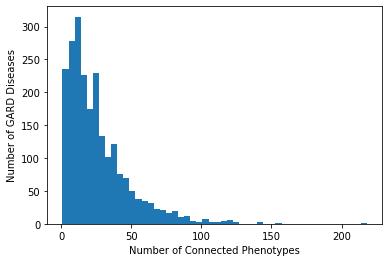

In [28]:
plt.hist(phen_df["count(s)"], bins=50)
plt.xlabel("Number of Connected Phenotypes")
plt.ylabel("Number of GARD Diseases")
plt.show()

In [31]:
#important to save- or else we'll need to run the query again after shutting down the notebook 
phen_df.to_csv("GARD_Phenotype_Distribution.csv")

In [24]:
%%time
#want to check how long the query will take in the notebook
#getting the count of diseases connected to phenotype nodes 
flip_phen_query = """match (n:S_HP)--(d:DATA) with n, d 
                    match p =(n)-[:R_rel{name:"has_phenotype"}]-(s:S_GARD) 
                    return d.id, n.N_Name, count(s)"""
flip_phen_dict = graph.run(flip_phen_query).data()

CPU times: user 190 ms, sys: 49.3 ms, total: 239 ms
Wall time: 5min 50s


In [28]:
flip_phen_df = pd.DataFrame.from_dict(flip_phen_dict)
flip_phen_df.head(10)

,d.id,n.N_Name,count(s)
0,HP:0001994,"[RENAL TUBULAR FANCONI SYNDROME, 'DE TONI-FANC...",5
1,HP:0001394,"[HEPATIC CIRRHOSIS, SCAR TISSUE REPLACES HEALT...",48
2,HP:0000365,"[HEARING DEFECT, CONGENITAL DEAFNESS, HEARING ...",207
3,HP:0003128,"[LACTICACIDOSIS, LACTICACIDEMIA, HYPERLACTICAC...",43
4,HP:0012465,"[INCREASED IRON CONCENTRATION IN LIVER, INCREA...",2
5,HP:0001397,"[LIVER STEATOSIS, FATTY LIVER, FATTY INFILTRAT...",45
6,HP:0100613,[DEATH IN EARLY ADULTHOOD],10
7,HP:0012464,DECREASED TRANSFERRIN SATURATION,1
8,HP:0004925,CHRONIC LACTIC ACIDOSIS,3
9,HP:0003452,INCREASED SERUM IRON,5


In [34]:
flip_phen_df.sort_values(by="count(s)", ascending=False)

,d.id,n.N_Name,count(s)
18,HP:0000007,"[AUTOSOMAL RECESSIVE, AUTOSOMAL RECESSIVE FORM...",1048
17,HP:0000006,"[AUTOSOMAL DOMINANT, AUTOSOMAL DOMINANT TYPE, ...",844
127,HP:0001250,"[SEIZURE, SEIZURES, EPILEPSY]",531
103,HP:0001249,"[INTELLECTUAL DISABILITY, NONPROGRESSIVE INTEL...",531
53,HP:0001263,"[RETARDED DEVELOPMENT, LACK OF PSYCHOMOTOR DEV...",452
...,...,...,...
4639,HP:0007546,LINEAR HYPERPIGMENTATION,1
4638,HP:0006638,"[MISSING MIDDLE PART OF COLLARBONE, MIDCLAVICU...",1
4637,HP:0011847,GIANT CELL TUMOR OF BONE,1
4636,HP:0011599,MESOCARDIA,1


In [30]:
flip_phen_df.to_csv("Phenotype_GARD_Distribution.csv")

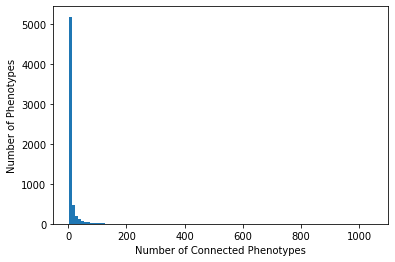

In [39]:
plt.hist(flip_phen_df["count(s)"], bins=100)
plt.xlabel("Number of Connected Phenotypes")
plt.ylabel("Number of Phenotypes")
plt.show()

In [3]:
#creating a list of ontologies
list_query = "match (n:DATASOURCE) return n.name"
list_dict = graph.run(list_query).data()

In [40]:
#realizing that the .data() py2neo function actually does NOT return a dictionary
#instead returns a list of dictionaries, so this for loop pulls out the ontologies from that
ontologies = [onto['n.name'] for onto in list_dict]
print(ontologies, len(ontologies))

['GARD', 'doid.owl.gz', 'GHR', 'NORD', 'Thesaurus.owl.gz', 'MESH.ttl.gz', 'hp.owl.gz', 'MEDLINEPLUS.ttl.gz', 'OMIM.ttl.gz', 'ICD10CM.ttl.gz', 'ordo_orphanet.owl.gz', 'bto.owl.gz', 'VANDF.ttl.gz', 'chebi.xrdf.gz', 'CLINVAR', 'clo.owl.gz', 'ddiem.owl.gz', 'uberon.owl.gz', 'cl.owl.gz', 'go.owl.gz', 'ogg.owl.gz', 'geno.owl.gz', 'mp.owl.gz', 'pw.owl.gz', 'oae.owl.gz', 'rxno.owl.gz', 'pato.owl.gz', 'fma.owl.gz', 'efo.owl.gz', 'mondo.owl.gz', 'rancho-disease-drug_2018-12-18_13-30.txt', 'FDAOrphanGARD_20190216.txt', 'MEDGEN', 'HPO_annotation_100918.txt'] 34


In [42]:
#list of the ontologies as their node label
otlgs = ["S_BTO","S_CHEBI","S_CL","S_CLINVAR","S_CLO","S_DDIEM","S_DOID","S_EFO","S_FDAORPHANGARD_20190216","S_FMA"
         ,"S_GARD","S_GENO","S_GHR","S_GO","S_HPO_ANNOTATION_100918","S_ICD10CM","S_MEDGEN","S_MEDLINEPLUS"
         ,"S_MESH","S_MONDO","S_MP","S_NORD","S_OAE","S_OGG","S_OMIM","S_ORDO_ORPHANET","S_PATO","S_PW"
         ,"S_RANCHO-DISEASE-DRUG_2018-12-18_13-30","S_RXNO","S_THESAURUS","S_UBERON","S_VANDF"]

In [49]:
#create a function to execute this distribution query for the other databases
def phenotype_dist(onto_name, make_csv=True, output=True):
    query = f"""match (n:{onto_name})--(d:DATA)  with n, d 
            match p =(n)-[:R_rel{{name:"has_phenotype"}}]
            -(s:S_HP) return d.id, n.N_Name, count(s)"""
    dictionary = graph.run(query).data()
    df = pd.DataFrame.from_dict(dictionary)
    if make_csv:
        df.to_csv(f"{onto_name}_Phenotype_Distribution.csv")
    if output:
        print(f"{onto_name} distribution done.")
    return df